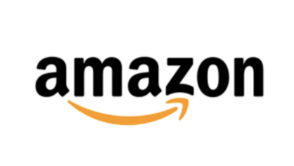

# **Impact of Discounts on Amazon Sales & Customer Analysis**

## **Background**
Amazon is one of the largest e-commerce platforms, offering a wide range of products with frequent discounts and promotions. However, despite providing significant discounts across various categories, data suggests that **higher discounts do not always result in better customer satisfaction**. Some products with bigger discounts still receive **lower ratings**, which raises important questions about:
- **Customer perception** of discounted products  
- **Product quality concerns** at higher discount rates  
- **Purchasing behavior** and its relationship with discount strategies  

Additionally, Amazon wants to **optimize its discount strategies** for high-ticket items (expensive products) to ensure that customers are satisfied with their purchases. The company also needs insights into:
- **Which product categories benefit the most from discounts**  
- **How customer feedback can improve overall sales and shopping experiences**  

This analysis will help Amazon make **data-driven decisions** to enhance customer satisfaction and maximize revenue.


## 1. Importing data

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# create data set
amazon = pd.read_csv("/content/drive/MyDrive/Studing BA/Data file/amazon.csv")
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 2. Data preparation

**Steps to consider: **
- Data cleaning (missing values, outliers)
- Data check (data type, inconsistency)
- Data Transformation (create necessary columns for futher analysis)

In [4]:
# Data cleaning
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
amazon.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [6]:
amazon.dropna(inplace = True)

In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

<Axes: >

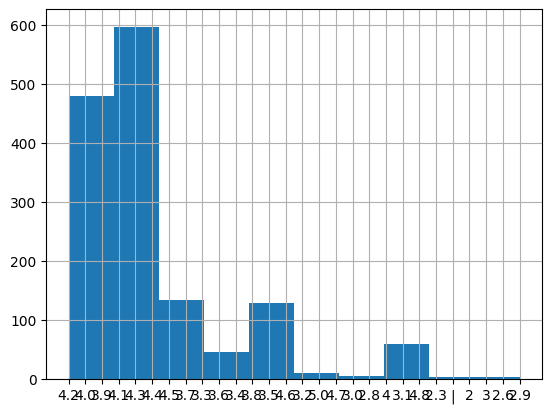

In [8]:
amazon['rating'].hist()

In [9]:
amazon = amazon[amazon['rating'] != "|"]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  review_content       1462 non-null   object
 14  img_link             1462 non-null   object
 15  product_link         1462 non-null   object
dtypes: object(1

In [10]:
# Data convert
amazon[['actual_price','discounted_price']]

,actual_price,discounted_price
0,"₹1,099",₹399
1,₹349,₹199
2,"₹1,899",₹199
3,₹699,₹329
4,₹399,₹154
...,...,...
1460,₹919,₹379
1461,"₹3,045","₹2,280"
1462,"₹3,080","₹2,219"
1463,"₹1,890","₹1,399"


In [11]:
amazon['discounted_price'] = amazon['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
amazon['actual_price'] = amazon['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
amazon[['actual_price','discounted_price']]

,actual_price,discounted_price
0,1099.0,399.0
1,349.0,199.0
2,1899.0,199.0
3,699.0,329.0
4,399.0,154.0
...,...,...
1460,919.0,379.0
1461,3045.0,2280.0
1462,3080.0,2219.0
1463,1890.0,1399.0


In [12]:
amazon['discount_percentage']

,discount_percentage
0,64%
1,43%
2,90%
3,53%
4,61%
...,...
1460,59%
1461,25%
1462,28%
1463,26%


In [13]:
amazon['discount_percentage'] = amazon['discount_percentage'].astype(str).str.replace('%', '').astype(float)

amazon['discount_percentage']


,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0
...,...
1460,59.0
1461,25.0
1462,28.0
1463,26.0


In [14]:
amazon['rating_count'] = amazon['rating_count'].astype(str).str.replace(',', '').astype(int)
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'], errors='coerce')


In [15]:
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

In [16]:
amazon['category']

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...
...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe..."
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E..."


In [17]:
# create new column
def main_category(category):
  return category.split('|')[0].strip()

def sub_category(category):
  return category.split('|')[-1].strip()


amazon['main_category']= amazon['category'].apply(main_category)
amazon['sub_category']= amazon['category'].apply(sub_category)

amazon['main_category'].value_counts()

,count
main_category,
Electronics,526
Computers&Accessories,451
Home&Kitchen,447
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [18]:
amazon['sub_category'].value_counts()

,count
sub_category,
USBCables,231
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
InternalHardDrives,1
WoodenPencils,1
BatteryChargers,1


In [19]:
amazon['main_category'] =amazon['main_category'].replace(['MusicalInstruments', 'HomeImprovement','Toys&Games','Car&Motorbike','Health&PersonalCare'], 'Others')
amazon['main_category'].value_counts()

,count
main_category,
Electronics,526
Computers&Accessories,451
Home&Kitchen,447
OfficeProducts,31
Others,7


In [20]:
# prompt: create a column "sale_volumn_discount" by multiply rating counts and discounted price

amazon['sale_volumn_discount'] = amazon['rating_count'] * amazon['discounted_price']


In [21]:
amazon.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,sale_volumn_discount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,USBCables,9683331.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,USBCables,8754806.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,USBCables,1577672.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,USBCables,31045427.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,USBCables,2603370.0


In [22]:
amazon['rating_count'].sum()

26765385

## 3. Data analysis

## **Key Aspects to Consider:**
* Overall Discount Trends: Evaluate the average discount percentage across all products.
* Correlation Between Ratings and Discounts: Analyze how product ratings change with varying discount levels.
* Discount Distribution by Category: Examine how discounts are distributed across different product categories.
* High-Value Products After Discounts: Identify the most expensive items based on their final prices after discounts.
* Customer Satisfaction Analysis: Assess overall customer ratings and satisfaction levels in relation to discounts.

And other relevant factors that may impact sales, customer perception, and purchasing behavior.

You are encouraged to further the analysis as much as you can)

## **Note**
*A sample dashboard is provided for reference, but you are encouraged to develop your own approach based on the available data and insights you uncover!*  


## **3.1 DISCOUNT DISTRIBUTION AND GENERAL REVIEW**


In [ ]:
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category',
       'sub_category', 'sale_volumn_discount'],
      dtype='object')

In [ ]:
amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,sale_volumn_discount
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881,4.919131e+07
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572,1.680290e+08
min,39.000000,39.000000,0.000000,2.000000,2.000000,3.980000e+02
25%,325.000000,800.000000,32.000000,4.000000,1191.500000,6.687730e+05
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000,4.132588e+06
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000,2.605253e+07
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,2.667292e+09


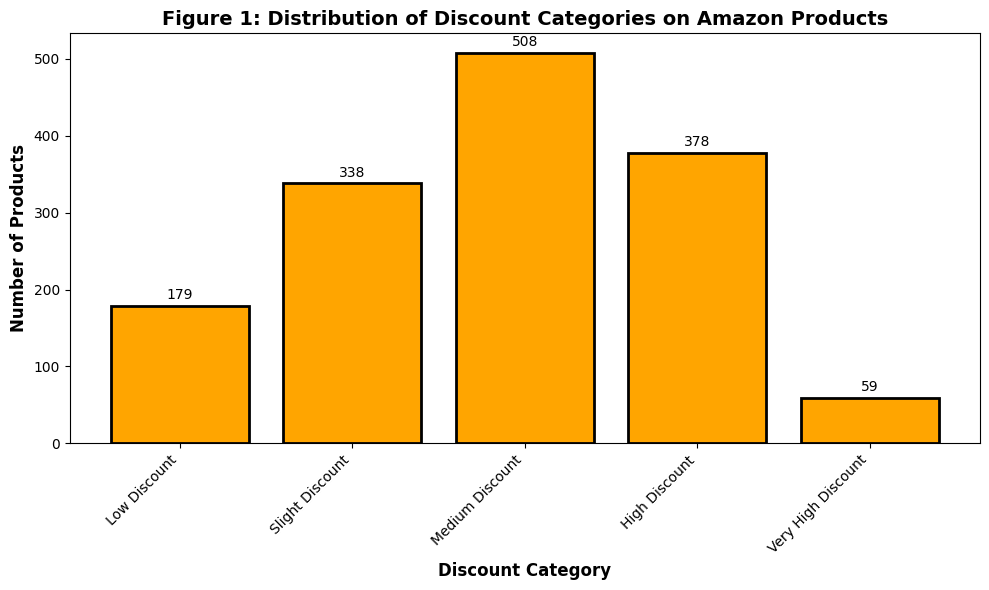

In [ ]:
def discount_category(category):
    if 0 <= category <= 20:
      return 'Low Discount'
    elif category <= 40:
      return 'Slight Discount'
    elif category <= 60:
      return 'Medium Discount'
    elif category <= 80:
      return 'High Discount'
    elif category > 80:
      return 'Very High Discount'
    else:
      return 'Negative'

amazon['discount_category'] = amazon['discount_percentage'].apply(discount_category)

category_order = ['Low Discount', 'Slight Discount', 'Medium Discount', 'High Discount', 'Very High Discount']

discount_counts = amazon['discount_category'].value_counts()

discount_counts = discount_counts.reindex(category_order)

plt.figure(figsize=(10, 6))
bars = plt.bar(discount_counts.index, discount_counts.values, color='orange', linewidth=2, edgecolor='black')

plt.xlabel("Discount Category", fontsize=12, fontweight = 'bold')
plt.ylabel("Number of Products", fontsize=12, fontweight = 'bold')
plt.title("Figure 1: Distribution of Discount Categories on Amazon Products", fontsize=14, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom', fontsize=10)

plt.show()

- Discounts are effective in the range of 40 - 60% when the purchase volume is higher than the discount percentages in other segments.
- In the slight discount segment (20 - 40%) and the high discount segment (60 - 80%) there is a slight decrease but still has a fairly stable impact
- The remaining two segments have a significant decrease in sale volume so there will not be too much impact

=> Discount percentage is effective in the range of 20 - 80% and peaks in the range of 40 - 60%. This can also be seen as the discount segment has a relatively large impact on sale volume if not considering different items.

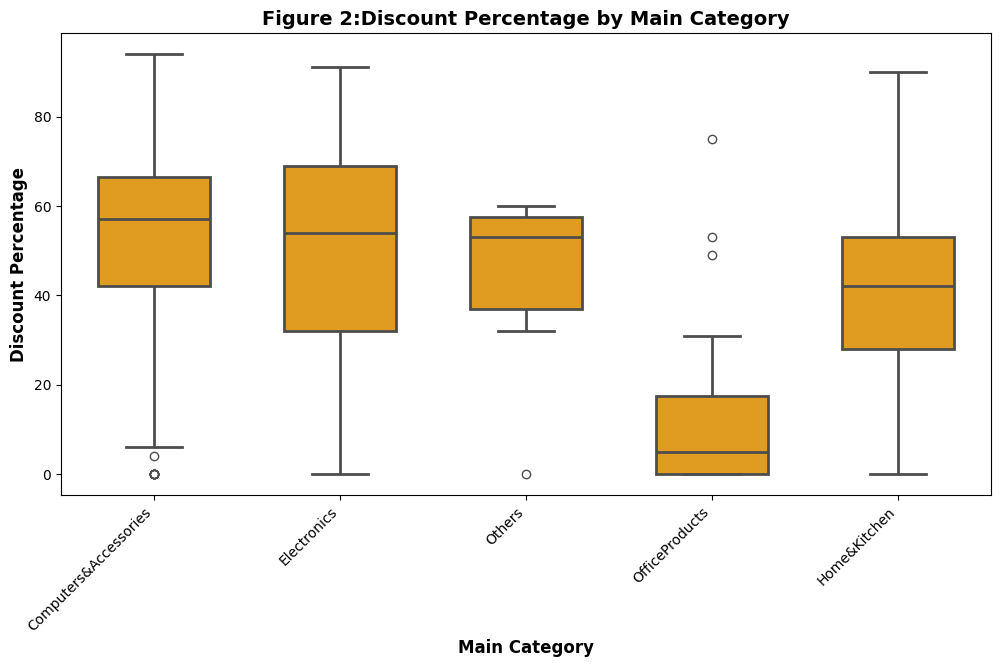

In [ ]:
# prompt: change the box plot color to orange and make the box plot and word font more bold in the box plot chart above

plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='discount_percentage', data=amazon, color='orange', linewidth=2, width=0.6) # Set box color to orange and linewidth
plt.title('Figure 2:Discount Percentage by Main Category', fontsize=14, fontweight='bold') # Set title fontweight
plt.xlabel('Main Category', fontsize=12, fontweight='bold') # Set xlabel fontweight
plt.ylabel('Discount Percentage', fontsize=12, fontweight='bold') # Set ylabel fontweight
plt.xticks(rotation=45, ha='right', fontsize=10) # Set xticks fontweight and rotation
plt.yticks(fontsize=10) # Set yticks fontweight
plt.show()


According to the boxplot chart, we can also see that the main categories also have quite similar influences when the items will often apply the discount strategy in the medium segment on most items except for office products because the number of items is quite small in the total number of items on Amazon (31 items), so it will not affect too much.

## **3.2 CORRELATION BETWEEN DISCOUNTS AND RATINGS**


In [ ]:
average_percentage = amazon.groupby('main_category').discount_percentage.mean()
average_percentage

,discount_percentage
main_category,
Computers&Accessories,53.920177
Electronics,50.828897
Home&Kitchen,40.174497
OfficeProducts,12.354839
Others,43.142857


In [ ]:
formula_1 = 'rating ~ discount_percentage'
model_1 = smf.ols(formula_1, data=amazon).fit()
print(model_1.summary())

formula_2 = 'rating_count ~ discount_percentage'
model_2 = smf.ols(formula_2, data=amazon).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           2.18e-09
Time:                        08:16:40   Log-Likelihood:                -243.74
No. Observations:                1462   AIC:                             491.5
Df Residuals:                    1460   BIC:                             502.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1961    

<ipython-input-31-1600971c8dbe>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation1 = f"y = {model1.params[1]:.4f}x + {model1.params[0]:.4f}\nR² = {model1.rsquared:.4f}"
<ipython-input-31-1600971c8dbe>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation2 = f"y = {model2.params[1]:.4f}x + {model2.params[0]:.4f}\nR² = {model2.rsquared:.4f}"


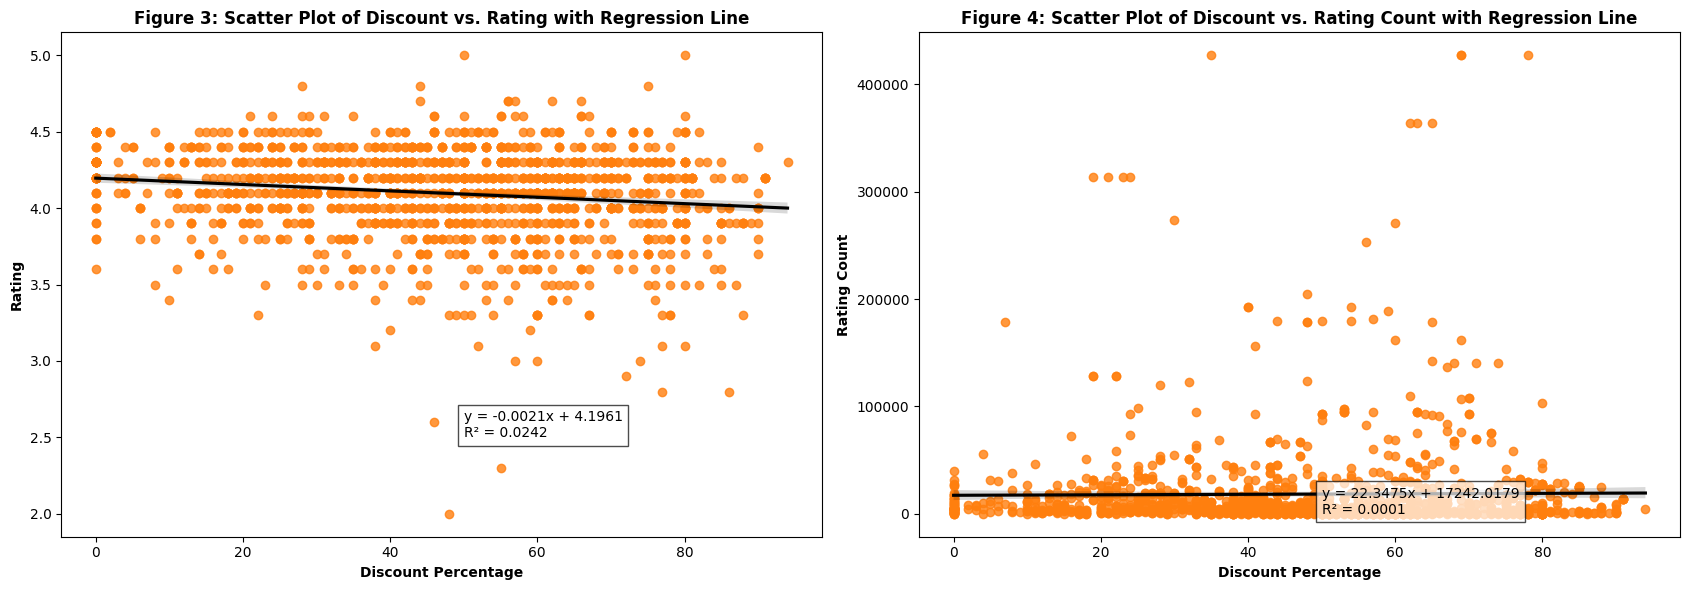

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

X1 = amazon['discount_percentage']
y1 = amazon['rating']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()

sns.regplot(x='discount_percentage', y='rating', data=amazon, ci=95,
            color='tab:orange', line_kws={"color": "black"},ax=axes[0])

axes[0].set_title("Figure 3: Scatter Plot of Discount vs. Rating with Regression Line", fontweight='bold')
axes[0].set_xlabel("Discount Percentage", fontweight='bold')
axes[0].set_ylabel("Rating", fontweight='bold')


equation1 = f"y = {model1.params[1]:.4f}x + {model1.params[0]:.4f}\nR² = {model1.rsquared:.4f}"
axes[0].text(50, 2.5, equation1, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7))

X2 = amazon['discount_percentage']
y2 = amazon['rating_count']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()

sns.regplot(x='discount_percentage', y='rating_count', data=amazon, ci=95,
            color='tab:orange', line_kws={"color": "black"}, ax=axes[1])

axes[1].set_title("Figure 4: Scatter Plot of Discount vs. Rating Count with Regression Line", fontweight='bold')
axes[1].set_xlabel("Discount Percentage", fontweight='bold')
axes[1].set_ylabel("Rating Count", fontweight='bold')

equation2 = f"y = {model2.params[1]:.4f}x + {model2.params[0]:.4f}\nR² = {model2.rsquared:.4f}"
axes[1].text(50, 2.5, equation2, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()



                     discount_percentage    rating  rating_count
discount_percentage             1.000000 -0.155679      0.011294
rating                         -0.155679  1.000000      0.102235
rating_count                    0.011294  0.102235      1.000000


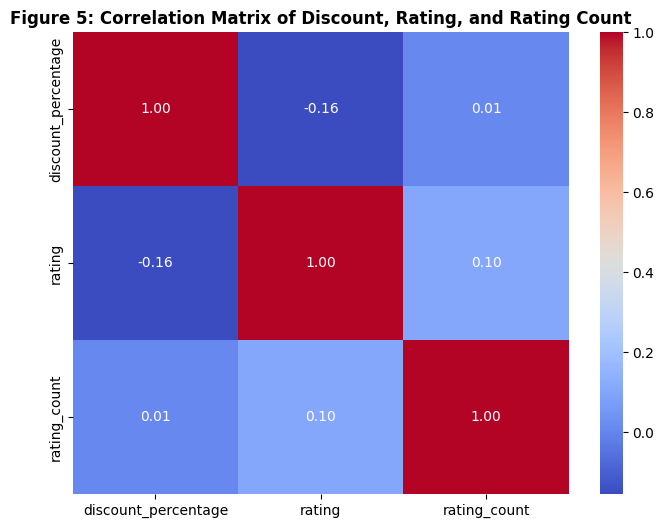

In [ ]:
correlation_matrix = amazon[['discount_percentage', 'rating', 'rating_count']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 5: Correlation Matrix of Discount, Rating, and Rating Count', fontweight='bold')
plt.show()

No Relationship between discount percentage and ratings and rating count

## **3.3 RELATIONSHIP BETWEEN DISCOUNT AND SALE VOLUMN**


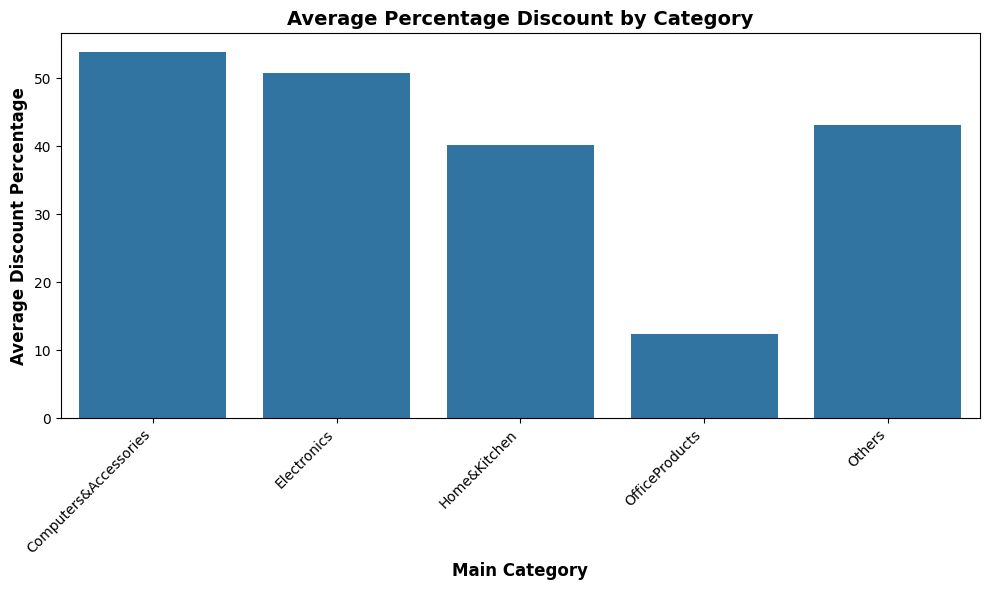

In [ ]:
plt.figure(figsize=(10, 6))
average_discount_by_category = amazon.groupby('main_category')['discount_percentage'].mean()
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Average Discount Percentage", fontsize=12, fontweight='bold')
plt.title("Average Percentage Discount by Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


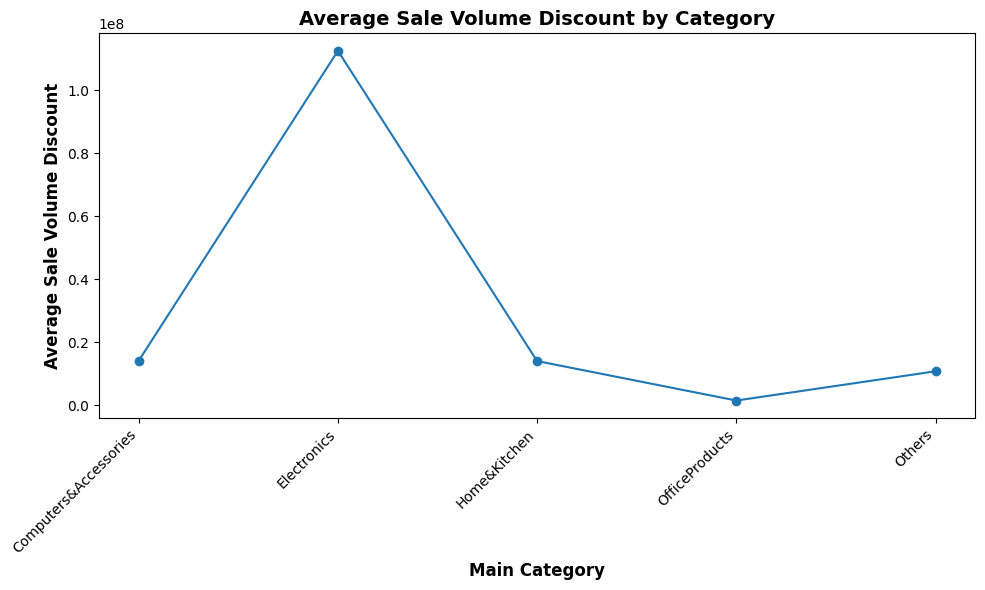

In [ ]:
# prompt: create a line chart using the average sale volumn discount by category

import matplotlib.pyplot as plt
# Assuming 'amazon' DataFrame is already loaded as in the provided code.

plt.figure(figsize=(10, 6))
average_sale_discount = amazon.groupby('main_category')['sale_volumn_discount'].mean()
plt.plot(average_sale_discount.index, average_sale_discount.values, marker='o', linestyle='-')
plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Average Sale Volume Discount", fontsize=12, fontweight='bold')
plt.title("Average Sale Volume Discount by Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


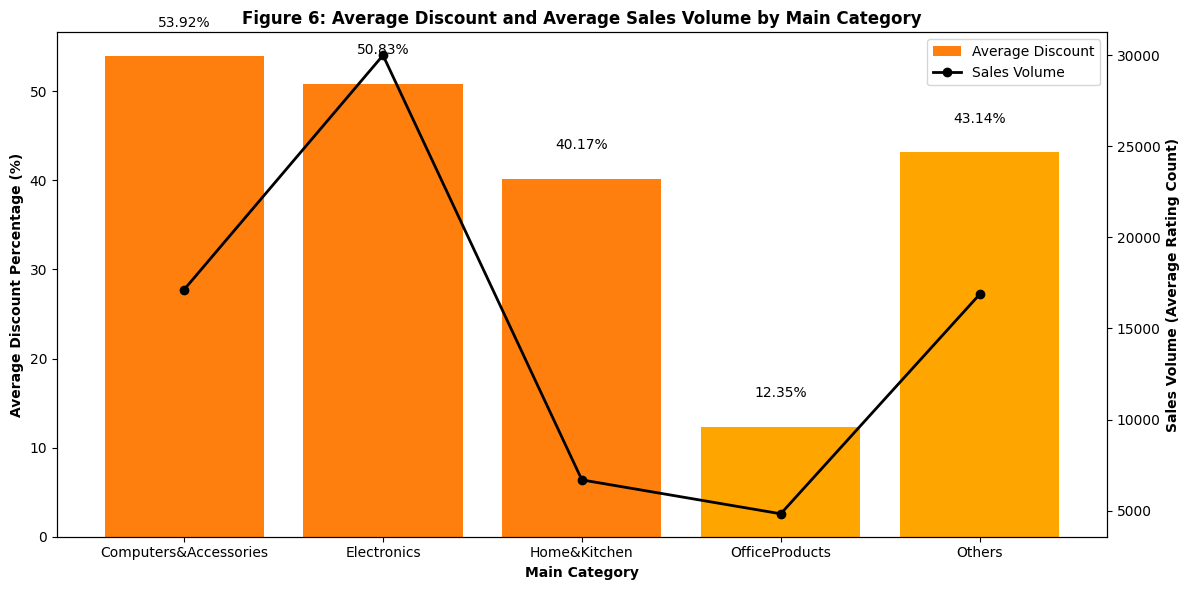

In [ ]:
sales_volume = amazon.groupby('main_category')['rating_count'].mean()
average_discounts = amazon.groupby('main_category')['discount_percentage'].mean()
bar_colors = ['tab:orange' if category not in ['OfficeProducts', 'Others'] else 'orange' for category in average_discounts.index]

fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(average_discounts.index, average_discounts.values, color=bar_colors, label='Average Discount')
ax1.set_xlabel('Main Category', fontweight='bold')
ax1.set_ylabel('Average Discount Percentage (%)', fontweight='bold')
ax1.tick_params(axis='y')
ax1.set_title('Figure 6: Average Discount and Average Sales Volume by Main Category', fontweight='bold')


for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 3, f'{height:.2f}%', ha='center', va='bottom', color='black', fontsize=10)


ax2 = ax1.twinx()
ax2.plot(sales_volume.index, sales_volume.values, color='black', marker='o', linestyle='-', linewidth=2, label='Sales Volume')
ax2.set_ylabel('Sales Volume (Average Rating Count)', fontweight='bold')
ax2.tick_params(axis='y')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

- Office Products has the lowest percentage and lowest sale volume because the product variety is not too diverse (31 products)
- Computer & Accessories and Electronics have discount percentage due to the diversity of products but in contrast, computer & accessories have a quite low sale volume compared to electronics, almost double.
- Home & Kitchen is also in the fairly stable discount segment, but the sale volume is quite low, even on par with Office Products.
- On the Others side, although it is a combination of many small main categories so the results will not be accurate, it still achieves a good sales volume equal to the Computer & Accessories side.

=> It can be seen that Home&Kitchen is currently facing many problems compared to other segments despite having a good discount percentage. It can be seen that the current problem lies in product quality, customer service or other factors besides discount percentage.

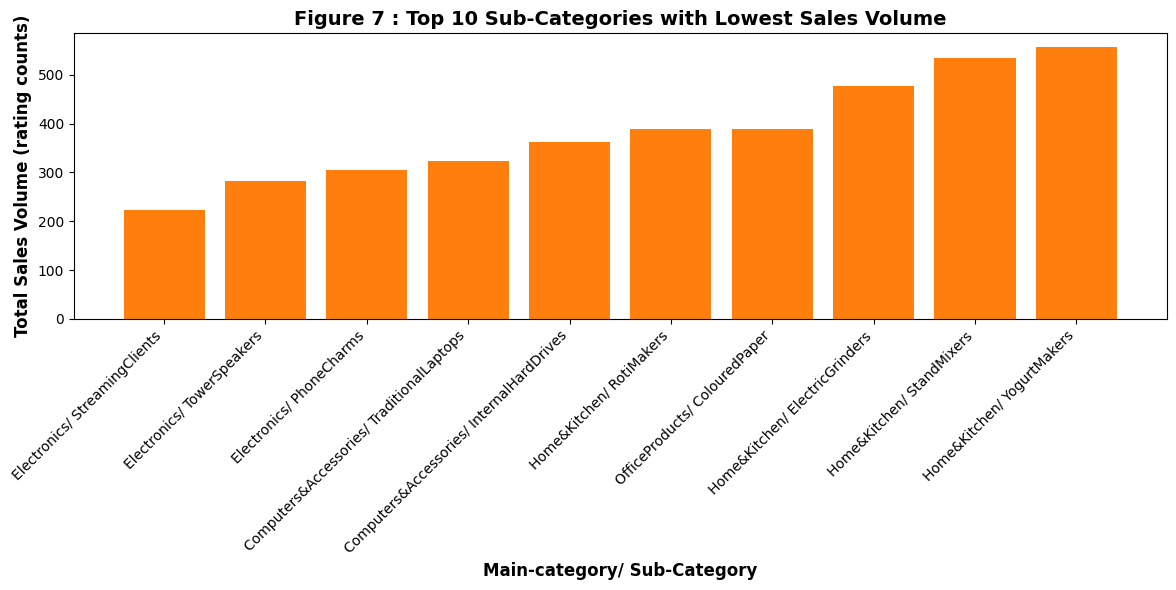

In [ ]:
# prompt: create a bar chart with the top 10 sub-category with lowest sale volumn

import matplotlib.pyplot as plt
# Assuming 'amazon' DataFrame is already loaded as in the provided code.

# Group by sub-category and sum the sales volume
sales_by_sub_category = amazon.groupby(['main_category', 'sub_category'])['rating_count'].sum()

# Sort the sub-categories by sales volume in ascending order
sorted_sales = sales_by_sub_category.sort_values(ascending=True)

# Get the top 10 sub-categories with the lowest sales volume
top_10_lowest_sales = sorted_sales.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
# Convert the MultiIndex to strings for plotting
x_labels = ['/ '.join(str(level) for level in index) for index in top_10_lowest_sales.index]
plt.bar(x_labels, top_10_lowest_sales.values, color='tab:orange') # Use x_labels for x-axis
plt.xlabel("Main-category/ Sub-Category", fontsize=12, fontweight = 'bold')
plt.ylabel("Total Sales Volume (rating counts)", fontsize=12, fontweight = 'bold')
plt.title("Figure 7 : Top 10 Sub-Categories with Lowest Sales Volume", fontsize=14, fontweight = 'bold')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

## **3.4 RELATIONSHIP BETWEEN RATING AND SALE VOLUMN**


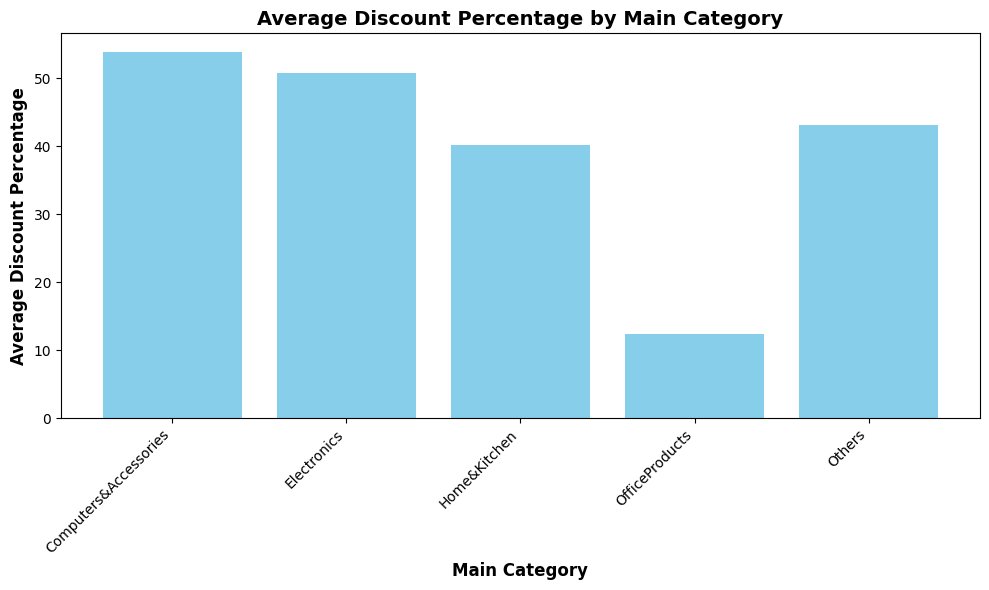

In [ ]:
# prompt: create a bar chart that illustrate the average discount percent by main category

import matplotlib.pyplot as plt

# Assuming 'amazon' DataFrame and 'average_discount_by_category' are already defined as in your provided code.

plt.figure(figsize=(10, 6))
average_discount_by_category = amazon.groupby('main_category')['discount_percentage'].mean()
plt.bar(average_discount_by_category.index, average_discount_by_category.values, color='skyblue')
plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Average Discount Percentage", fontsize=12, fontweight='bold')
plt.title("Average Discount Percentage by Main Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


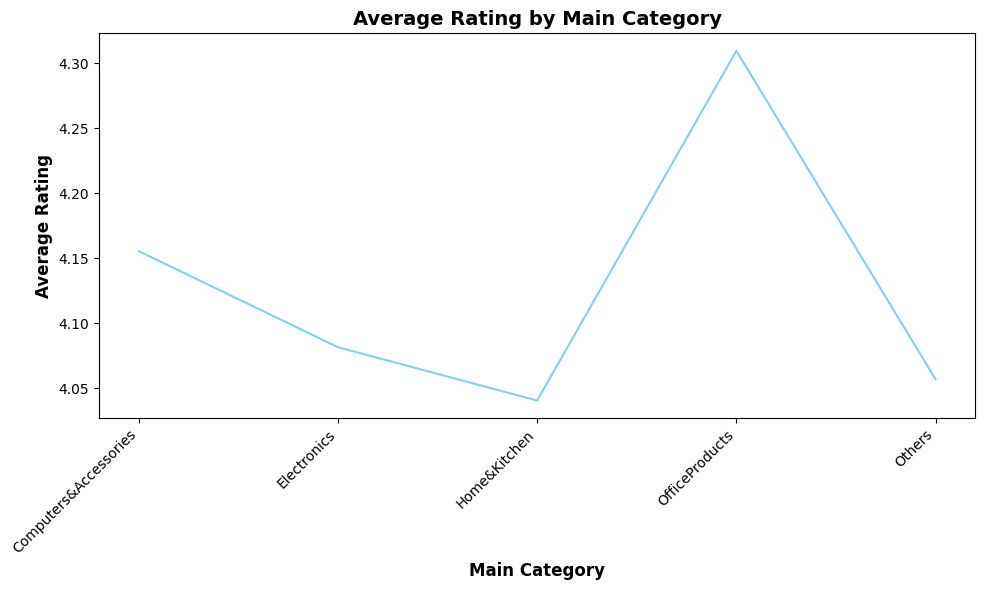

In [ ]:
# prompt: create a plot chart that illustrate the average rating by main category

import matplotlib.pyplot as plt

# Assuming 'amazon' DataFrame is already loaded and processed as in the provided code.

plt.figure(figsize=(10, 6))
average_rating_by_category = amazon.groupby('main_category')['rating'].mean()
plt.plot(average_rating_by_category.index, average_rating_by_category.values, color='skyblue')
plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Average Rating", fontsize=12, fontweight='bold')
plt.title("Average Rating by Main Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


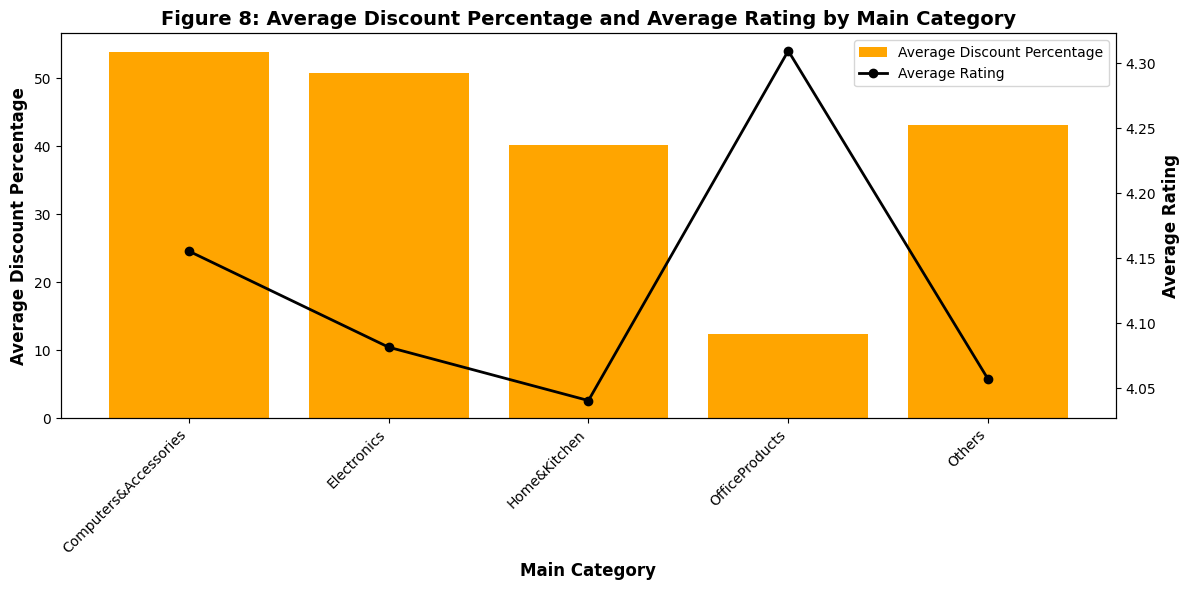

In [ ]:
# prompt: combine the bar chart (Average Discount Percentage by Main Category) and plot chart (Average Rating by Main Category) above into one chart

import matplotlib.pyplot as plt

# Assuming 'average_discount_by_category' and 'average_rating_by_category' are already calculated as in your previous code.

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average discount percentage
ax1.bar(average_discount_by_category.index, average_discount_by_category.values, color='orange', label='Average Discount Percentage')
ax1.set_xlabel("Main Category", fontsize=12, fontweight='bold')
ax1.set_ylabel("Average Discount Percentage", fontsize=12, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Figure 8: Average Discount Percentage and Average Rating by Main Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')


# Create a second y-axis for the average rating
ax2 = ax1.twinx()
ax2.plot(average_rating_by_category.index, average_rating_by_category.values, color='black', marker='o', linestyle='-', linewidth=2, label='Average Rating')
ax2.set_ylabel("Average Rating", fontsize=12, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')


plt.tight_layout()
plt.show()


- The chart above shows that Computer & Accessories and Electronics have a fairly high discounted percentage (> 50%) but the customer rating is only at an average level.

- On the contrary, Office Products is rated the best compared to other categories despite a very low average discounted percentage (< 20%).

- There is a common point when comparing here and figure 6 that Home & Kitchen is also rated at the lowest level in the categories.

=> The high discount does not affect the rating of the categories too much. The high rating will probably be influenced by other factors such as: Customer service, product quality, shipping time, etc.

=> In addition, Home & Kitchen has also shown a warning when continuously having items with low ratings as well as affecting the sales volume

## **3.5 HIGH VALUE ITEMS**


In [ ]:
# prompt: create a new column in amazon name "type of item" base on discounted price with different condition (cheap < 100, Budget- friendly < 500, Mid-range < 2000, quite high < 5000, high end )

def categorize_price(price):
  if price <= 100:
    return 'Cheap'
  elif price <= 500:
    return 'Budget-friendly'
  elif price <= 2000:
    return 'Mid-range'
  elif price <= 5000:
    return 'Quite-high'
  else:
    return 'High-end'

amazon['type of item'] = amazon['discounted_price'].apply(categorize_price)


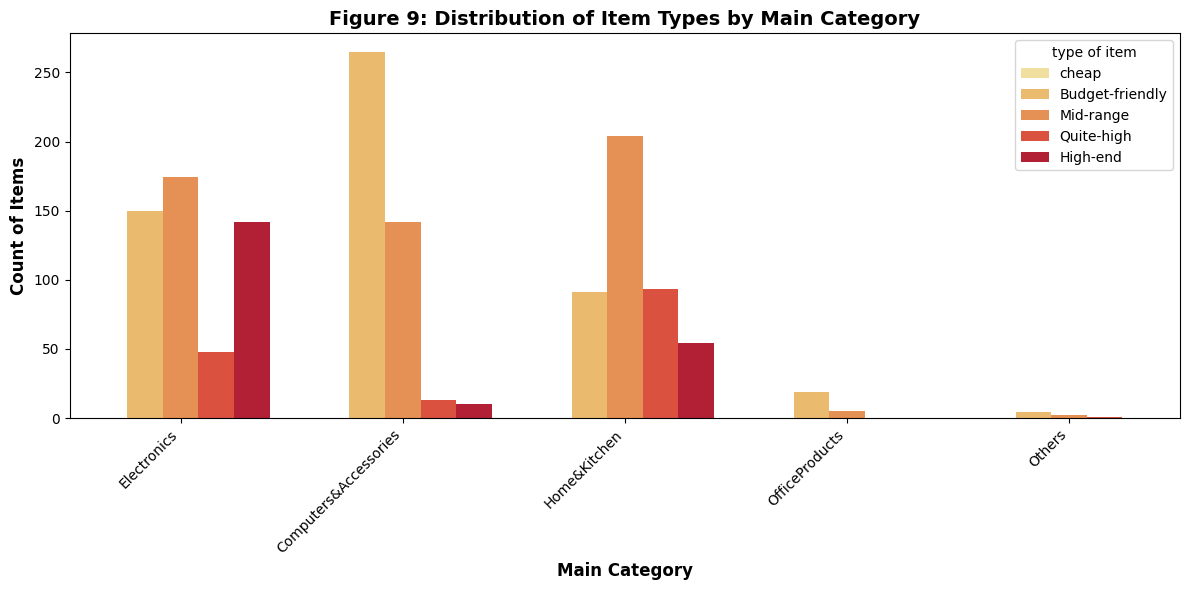

In [ ]:
# prompt: create a bar chart that illustrate different type of item by main category (color change by hot color) Sort by cheap, budget friendly, mid range, quite high, high end

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'amazon' DataFrame is already loaded and processed as in the provided code.

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='main_category', hue='type of item', data=amazon,
              order=amazon['main_category'].value_counts().index,
              hue_order=['cheap', 'Budget-friendly', 'Mid-range', 'Quite-high', 'High-end'],
              palette="YlOrRd", linewidth = 3)  # Use a sequential color palette for better visual representation


plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Count of Items", fontsize=12, fontweight='bold')
plt.title("Figure 9: Distribution of Item Types by Main Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


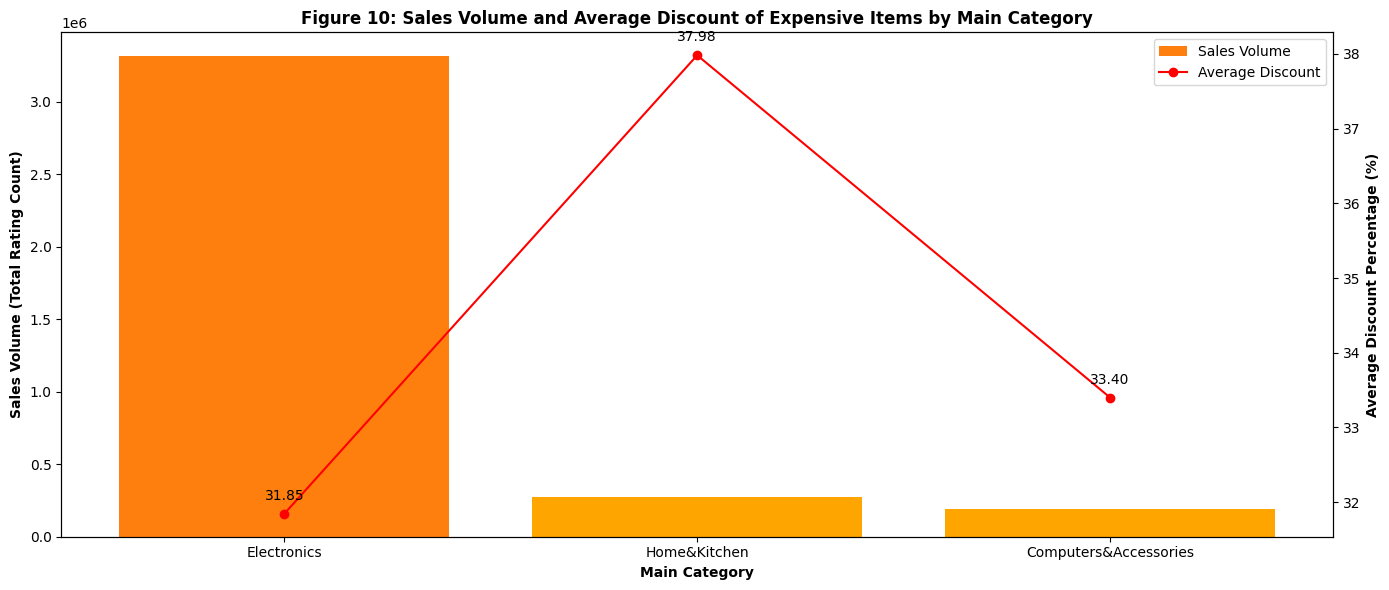

In [ ]:
sales_volume = amazon[amazon['type of item'] == "High-end"].groupby('main_category')['rating_count'].sum()
average_discounts = amazon[amazon['type of item'] == "High-end"].groupby('main_category')['discount_percentage'].mean()


sales_volume = sales_volume.sort_values(ascending=False)
average_discounts = average_discounts.loc[sales_volume.index]


fig, ax1 = plt.subplots(figsize=(14, 6))

colors = ['tab:orange' if category == 'Electronics' else 'orange' for category in sales_volume.index]

bars = ax1.bar(sales_volume.index, sales_volume.values, color=colors, label='Sales Volume')

ax1.set_xlabel("Main Category", fontweight='bold')
ax1.set_ylabel("Sales Volume (Total Rating Count)", fontweight='bold')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(average_discounts.index, average_discounts.values, color='red', marker='o', linestyle='-', label='Average Discount')
ax2.set_ylabel("Average Discount Percentage (%)", fontweight='bold')
ax2.tick_params(axis='y')


for i, txt in enumerate(average_discounts.values):
    ax2.annotate(f"{txt:.2f}",
                 xy=(i, txt),
                 xytext=(0, 10),
                 textcoords="offset points",
                 ha='center', fontsize=10, color='black')

plt.title("Figure 10: Sales Volume and Average Discount of Expensive Items by Main Category",fontweight = 'bold')
plt.xticks(rotation=45, ha="right")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

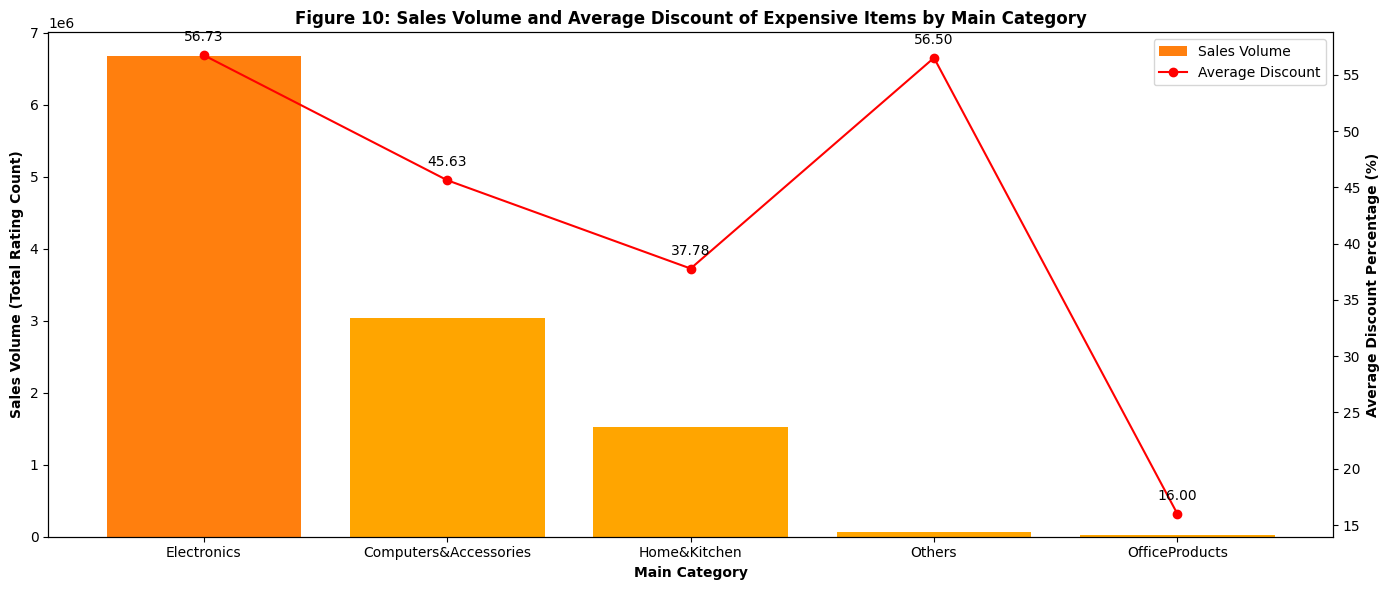

In [ ]:
sales_volume = amazon[amazon['type of item'] == "Mid-range"].groupby('main_category')['rating_count'].sum()
average_discounts = amazon[amazon['type of item'] == "Mid-range"].groupby('main_category')['discount_percentage'].mean()


sales_volume = sales_volume.sort_values(ascending=False)
average_discounts = average_discounts.loc[sales_volume.index]


fig, ax1 = plt.subplots(figsize=(14, 6))

colors = ['tab:orange' if category == 'Electronics' else 'orange' for category in sales_volume.index]

bars = ax1.bar(sales_volume.index, sales_volume.values, color=colors, label='Sales Volume')

ax1.set_xlabel("Main Category", fontweight='bold')
ax1.set_ylabel("Sales Volume (Total Rating Count)", fontweight='bold')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(average_discounts.index, average_discounts.values, color='red', marker='o', linestyle='-', label='Average Discount')
ax2.set_ylabel("Average Discount Percentage (%)", fontweight='bold')
ax2.tick_params(axis='y')


for i, txt in enumerate(average_discounts.values):
    ax2.annotate(f"{txt:.2f}",
                 xy=(i, txt),
                 xytext=(0, 10),
                 textcoords="offset points",
                 ha='center', fontsize=10, color='black')

plt.title("Figure 10: Sales Volume and Average Discount of Expensive Items by Main Category",fontweight = 'bold')
plt.xticks(rotation=45, ha="right")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

- Based on figure 9, it can be seen that most of the High-end products (> 5000) are often concentrated in Electronics. In addition, Home & Kitchen and Computer & Accessories also have high-end products.
- See details in figure 10, the high-end items are not distributed with reasonable discounts.
- Electronics has a good sale volume although the discount percentage is the lowest in the 3 categories (31.85%)
- Home & Kitchen has the highest discount percentage (37.98%) but the sale volume is only equal to Computer & Accessories with a moderate discount percentage (33.40%)

=> There is an uneven distribution of discounts in the 3 categories and especially needs to be adjusted a lot on the Home & Kitchen side.


## **3.6 CUSTOMER FEEDBACK**

In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re



# Convert necessary columns to strings to avoid NaN issues
amazon['review_title'] = amazon['review_title'].fillna('').astype(str)
amazon['review_content'] = amazon['review_content'].fillna('').astype(str)

# Ensure ratings are numeric for filtering
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

# Filter low-rated products (rating < 3)
low_rated_df = amazon[amazon['rating'] < 3.0].copy()

# Combine review_title and review_content
low_rated_df['combined_review'] = low_rated_df['review_title'] + ' ' + low_rated_df['review_content']

# Define text preprocessing function without NLTK
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        words = text.split()  # Tokenization (split by space)
        return ' '.join(words)
    return ''

# Apply preprocessing to reviews
low_rated_df['processed_review'] = low_rated_df['combined_review'].apply(preprocess_text)

# Perform Word Frequency Analysis (Unigrams)
vectorizer = CountVectorizer(max_features=50)  # Adjust max_features as needed
word_counts = vectorizer.fit_transform(low_rated_df['processed_review'])
word_list = vectorizer.get_feature_names_out()
word_frequency = word_counts.toarray().sum(axis=0)

# Create DataFrame for word frequency
word_freq_df = pd.DataFrame({'word': word_list, 'frequency': word_frequency})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

#  Perform N-gram Analysis (Bigrams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)  # Extract only bigrams
bigram_counts = bigram_vectorizer.fit_transform(low_rated_df['processed_review'])
bigram_list = bigram_vectorizer.get_feature_names_out()
bigram_frequency = bigram_counts.toarray().sum(axis=0)

# Create a DataFrame for bigram frequency
bigram_freq_df = pd.DataFrame({'bigram': bigram_list, 'frequency': bigram_frequency})
bigram_freq_df = bigram_freq_df.sort_values('frequency', ascending=False)

bigram_freq_df







,bigram,frequency
33,the product,6
18,it is,6
25,not working,5
15,is not,4
46,very good,4
1,and it,4
49,waste of,4
38,to buy,3
48,was not,3
2,and the,3


from matplotlib import pyplot as plt
bigram_freq_df['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
bigram_freq_df['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-120-bdcf098f1b86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=top_10_bigrams, palette="Blues_d")


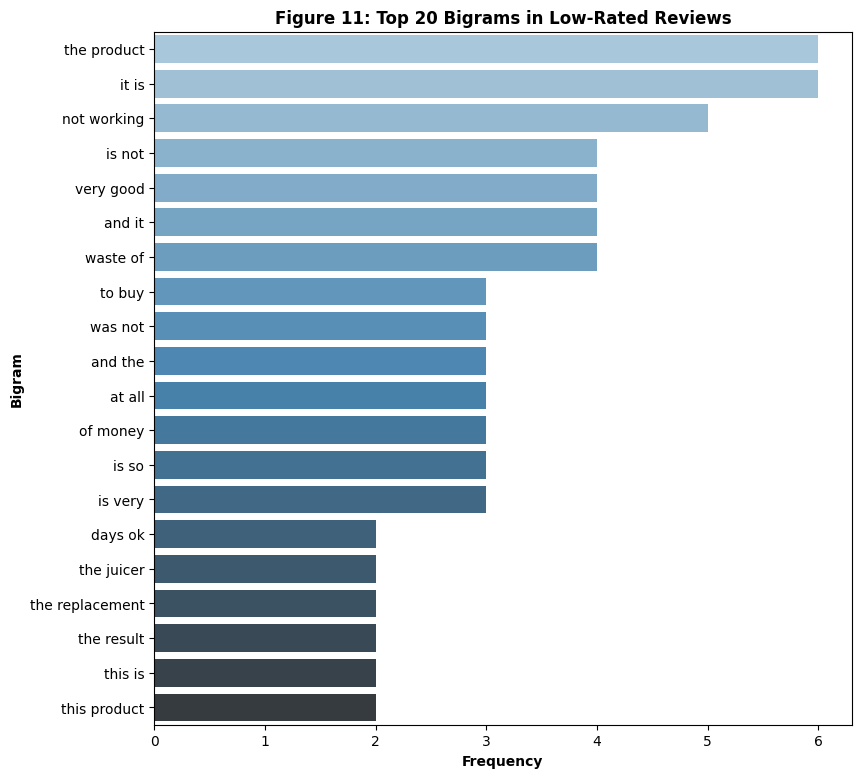

In [ ]:
plt.figure(figsize=(9, 9))
top_10_bigrams = bigram_freq_df.head(20)
sns.barplot(x='frequency', y='bigram', data=top_10_bigrams, palette="Blues_d")
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Bigram', fontweight='bold')
plt.title('Figure 11: Top 20 Bigrams in Low-Rated Reviews', fontweight='bold')
plt.show()

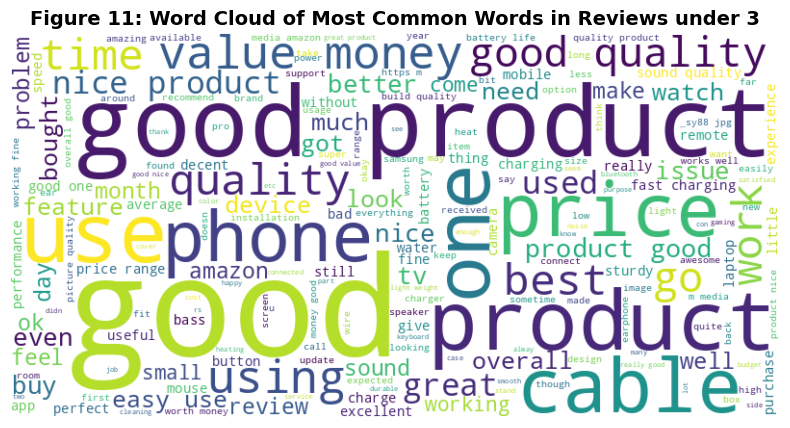

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


# Combine 'review_title' and 'review_content' into a single column
amazon['combined_review'] = amazon['review_title'].fillna('') + " " + amazon['review_content'].fillna('')

# Define a custom list of stopwords (avoiding NLTK dependency)
custom_stopwords = set([
    "a", "an", "the", "and", "or", "but", "if", "then", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out",
    "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
    "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
    "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t",
    "can", "will", "just", "don", "should", "now"
])

# Tokenize and clean the combined reviews
all_text = " ".join(amazon['combined_review']).lower()  # Convert to lowercase
words = re.findall(r'\b\w+\b', all_text)  # Extract words
filtered_words = [word for word in words if word not in custom_stopwords]  # Remove stopwords

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 11: Word Cloud of Most Common Words in Reviews under 3", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re



# Convert necessary columns to strings to avoid NaN issues
amazon['review_title'] = amazon['review_title'].fillna('').astype(str)
amazon['review_content'] = amazon['review_content'].fillna('').astype(str)

# Ensure ratings are numeric for filtering
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

# Filter low-rated products (rating < 3)
low_rated_df_home_kitchen = amazon[(amazon['rating'] < 3.0) & (amazon['main_category'] == "Home&Kitchen")].copy()

# Combine review_title and review_content
low_rated_df_home_kitchen['combined_review'] = low_rated_df_home_kitchen['review_title'] + ' ' + low_rated_df_home_kitchen['review_content']

# Define text preprocessing function without NLTK
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        words = text.split()  # Tokenization (split by space)
        return ' '.join(words)
    return ''

# Apply preprocessing to reviews
low_rated_df_home_kitchen['processed_review'] = low_rated_df_home_kitchen['combined_review'].apply(preprocess_text)

# Perform Word Frequency Analysis (Unigrams)
vectorizer_1 = CountVectorizer(max_features=50)  # Adjust max_features as needed
word_counts_1 = vectorizer_1.fit_transform(low_rated_df_home_kitchen['processed_review'])
word_list_1 = vectorizer_1.get_feature_names_out()
word_frequency_1 = word_counts_1.toarray().sum(axis=0)

# Create DataFrame for word frequency
word_freq_df_1 = pd.DataFrame({'word': word_list, 'frequency': word_frequency})
word_freq_df_1 = word_freq_df.sort_values('frequency', ascending=False)

#  Perform N-gram Analysis (Bigrams)
bigram_vectorizer_1 = CountVectorizer(ngram_range=(2, 2), max_features=50)  # Extract only bigrams
bigram_counts_1 = bigram_vectorizer_1.fit_transform(low_rated_df_home_kitchen['processed_review'])
bigram_list_1 = bigram_vectorizer_1.get_feature_names_out()
bigram_frequency_1 = bigram_counts_1.toarray().sum(axis=0)

# Create a DataFrame for bigram frequency
bigram_freq_df_1 = pd.DataFrame({'bigram': bigram_list, 'frequency': bigram_frequency_1})
bigram_freq_df_1 = bigram_freq_df_1.sort_values('frequency', ascending=False)

bigram_freq_df_1







,bigram,frequency
33,the product,6
19,life is,6
21,media amazon,5
14,fooled by,4
1,and it,4
38,to buy,3
22,more like,3
16,is so,3
49,waste of,3
2,and the,3


from matplotlib import pyplot as plt
bigram_freq_df_1['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
bigram_freq_df_1['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-124-6bdd07e7007f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=top_10_bigrams, palette="Blues_d")


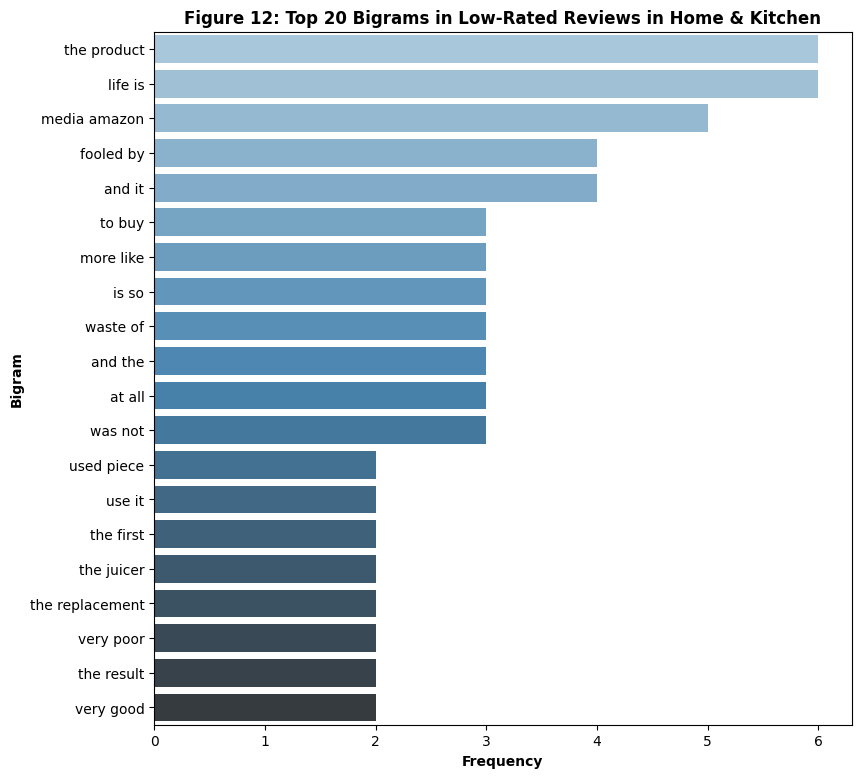

In [ ]:
plt.figure(figsize=(9, 9))
top_10_bigrams = bigram_freq_df_1.head(20)
sns.barplot(x='frequency', y='bigram', data=top_10_bigrams, palette="Blues_d")
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Bigram', fontweight='bold')
plt.title('Figure 12: Top 20 Bigrams in Low-Rated Reviews in Home & Kitchen', fontweight='bold')
plt.show()

From wordcloud Figure 11, it can be seen that in the low ratings of all products, there are still good rating keywords such as "good", "product", "price". In addition, other low rating words have also appeared more such as: "problem", "cable", "issue", "not working" have also appeared. This indicates that the quality of products with a score below 3 points does not have a low rating due to discounts but mostly comes from low product quality.

If we look at figure 12, when focusing on low-rated products in Home & Kitchen, in addition to the words that rate low product quality such as: "very poor", "life is", there are also words that rate wrong product marketing: "media amazon", "fooled by" and "waste of".

It can be concluded that the products when not satisfying customers mostly come from the product quality is not good and at the same time when learning more about products from Home & Kitchen, many products when purchased by customers are dissatisfied because the product is advertised incorrectly compared to reality leading to many negative reviews.